In [1]:
pip install wordcloud

In [11]:
import pandas as pd
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from pymystem3 import Mystem
from string import punctuation 
!wget http://download.cdn.yandex.net/mystem/mystem-3.0-linux3.1-64bit.tar.gz
!tar -xvf mystem-3.0-linux3.1-64bit.tar.gz
!cp mystem /root/.local/bin/mystem

--2022-01-26 11:09:35--  http://download.cdn.yandex.net/mystem/mystem-3.0-linux3.1-64bit.tar.gz
Resolving download.cdn.yandex.net (download.cdn.yandex.net)... 5.45.205.245, 5.45.205.242, 5.45.205.243, ...
Connecting to download.cdn.yandex.net (download.cdn.yandex.net)|5.45.205.245|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: http://cache-man01i.cdn.yandex.net/download.cdn.yandex.net/mystem/mystem-3.0-linux3.1-64bit.tar.gz [following]
--2022-01-26 11:09:36--  http://cache-man01i.cdn.yandex.net/download.cdn.yandex.net/mystem/mystem-3.0-linux3.1-64bit.tar.gz
Resolving cache-man01i.cdn.yandex.net (cache-man01i.cdn.yandex.net)... 5.45.205.221, 2a02:6b8::3:221
Connecting to cache-man01i.cdn.yandex.net (cache-man01i.cdn.yandex.net)|5.45.205.221|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16457938 (16M) [application/octet-stream]
Saving to: ‘mystem-3.0-linux3.1-64bit.tar.gz.3’

mystem-3.0-linux3.1 100%[===================>]  15.70M 

   Unnamed: 0  space                                             review class
0           0  Этажи  Интересное пространство. Много выставок, некот...     У
1           1  Этажи  Всё по порядку.\nСамо здание это несколько эта...     К
2           2  Этажи  Место не лишено художественного и социального ...     У
3           3  Этажи  Замечательное место!!!\nБольшой выбор еды. Мно...     К
4           4  Этажи  Любимое местечко питерской молодёжи.\nМагазинч...     У
Unnamed: 0    0
space         0
review        0
class         0
dtype: int64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


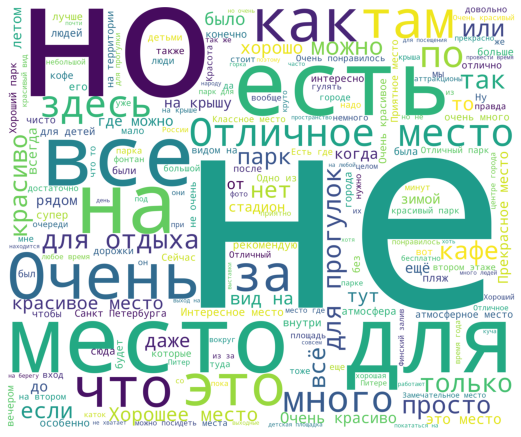

In [8]:

# Получение текстовой строки из списка слов
def str_corpus(corpus):
    str_corpus = ''
    for i in corpus:
        str_corpus += ' ' + i
    str_corpus = str_corpus.strip()
    return str_corpus


# Получение списка всех слов в корпусе
def get_corpus(data):
    corpus = []
    for phrase in data:
        for word in phrase.split():
            corpus.append(word)
    return corpus


# Получение облака слов
def get_wordCloud(corpus):
    wordCloud = WordCloud(background_color='white',
                              stopwords=STOPWORDS,
                              width=3000,
                              height=2500,
                              max_words=200,
                              random_state=42
                         ).generate(str_corpus(corpus))
    return wordCloud


data = pd.read_excel('Classified_spaces.xlsx')

print(data.head())

print(data.isna().sum())


corpus = get_corpus(data['review'].values)
procWordCloud = get_wordCloud(corpus)

fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(procWordCloud)
plt.axis('off')
plt.subplot(1, 2, 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  from ipykernel import kernelapp as app


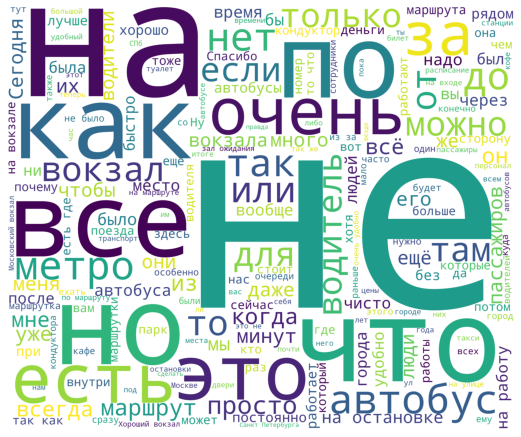

In [9]:
data1 = pd.read_excel('Classified_transport.xlsx')

#  data1.head()

#  data1.isna().sum()


corpus = get_corpus(data1['Review'].values)
procWordCloud = get_wordCloud(corpus)

fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(procWordCloud)
plt.axis('off')
plt.subplot(1, 2, 1)

In [12]:
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
from string import punctuation
russian_stopwords = stopwords.words("russian")

# Удаление знаков пунктуации из текста
def remove_punct(text):
    #  table = {33: '.', 34: ',', 35: '<', 36: '>', 37: '?', 38: '!', 39: '@', 40: '#', 41: '$', 42: '^', 43: '%', 44: '&', 45: '*', 46: '(', 47: ')', 58: '-', 59: '+', 60: '=', 61: '[', 62: ']', 63: '{', 64: '}', 91: ':', 92: ';', 93: '|', 94: '`', 95: '"', 96: '\'', 123: '/', 124: '~', 125: '№', 126: '\n'}
    #  return text.translate(table)
    table = {33: ' ', 34: ' ', 35: ' ', 36: ' ', 37: ' ', 38: ' ', 39: ' ', 40: ' ', 41: ' ', 42: ' ', 43: ' ', 44: ' ', 45: ' ', 46: ' ', 47: ' ', 58: ' ', 59: ' ', 60: ' ', 61: ' ', 62: ' ', 63: ' ', 64: ' ', 91: ' ', 92: ' ', 93: ' ', 94: ' ', 95: ' ', 96: ' ', 123: ' ', 124: ' ', 125: ' ', 126: ' '}
    return text.translate(table)

clean_reviews = pd.DataFrame(columns=['Review', 'Class'])

mystem = Mystem() 

clean_reviews['Review'] = data['review'].map(lambda x: x.lower())
clean_reviews['Review'] = clean_reviews['Review'].map(lambda x:remove_punct(x))
clean_reviews['Review'] = clean_reviews['Review'].map(lambda x: mystem.lemmatize(x))
#  clean_reviews['Review'] = clean_reviews['Review'].map(lambda x: x.split(' '))
clean_reviews['Review'] = clean_reviews['Review'].map(lambda x: [token.strip() for token in x if token not in russian_stopwords\
                                                                  and token != " " \
                                                                  and token.strip() not in punctuation])
clean_reviews['Review'] = clean_reviews['Review'].map(lambda x: ' '.join(x))

clean_reviews['Class'] = data['class']

clean_reviews.head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Review,Class
0,интересный пространство выставка некоторый пла...,У
1,порядок здание это несколько этаж маленький ма...,К
2,место лишать художественный социальный смысл а...,У
3,замечательный место большой выбор еда разный а...,К
4,любить местечко питерский молодежь магазинчик ...,У


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


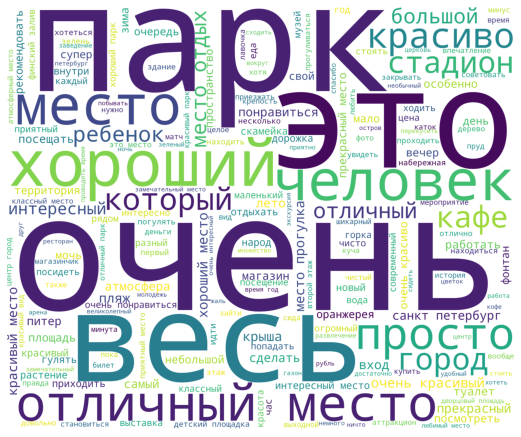

In [13]:
corpus = get_corpus(clean_reviews['Review'].values)
procWordCloud = get_wordCloud(corpus)

fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(procWordCloud)
plt.axis('off')
plt.subplot(1, 2, 1)

In [14]:
clean_transport_reviews = pd.DataFrame(columns=['Review', 'Class'])

clean_transport_reviews['Review'] = data1['Review'].map(lambda x: x.lower())
clean_transport_reviews['Review'] = clean_transport_reviews['Review'].map(lambda x: remove_punct(x))
clean_transport_reviews['Review'] = clean_transport_reviews['Review'].map(lambda x: mystem.lemmatize(x))
clean_transport_reviews['Review'] = clean_transport_reviews['Review'].map(lambda x: [token.strip() for token in x if token not in russian_stopwords\
                                                                  and token != " " \
                                                                  and token.strip() not in punctuation])
clean_transport_reviews['Review'] = clean_transport_reviews['Review'].map(lambda x: ' '.join(x))

clean_transport_reviews['Class'] = data1['Class']

clean_reviews.head()

,Review,Class
0,интересный пространство выставка некоторый пла...,У
1,порядок здание это несколько этаж маленький ма...,К
2,место лишать художественный социальный смысл а...,У
3,замечательный место большой выбор еда разный а...,К
4,любить местечко питерский молодежь магазинчик ...,У


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


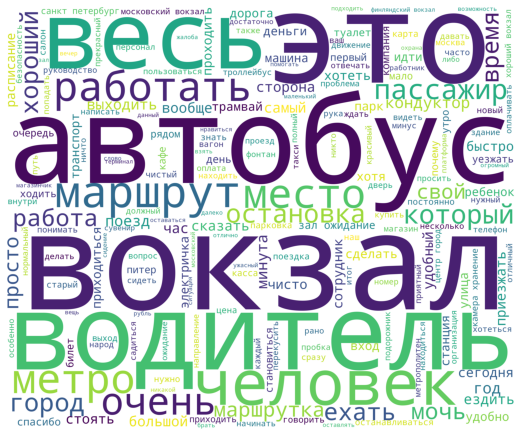

In [15]:
corpus = get_corpus(clean_transport_reviews['Review'].values)
procWordCloud = get_wordCloud(corpus)

fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(procWordCloud)
plt.axis('off')
plt.subplot(1, 2, 1)

In [ ]:
clean_reviews['Class'].value_counts()

К    8042
У    2972
Б     238
Name: Class, dtype: int64

In [ ]:
clean_transport_reviews['Class'].value_counts()

К    2906
Б     592
Name: Class, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(clean_reviews['Review'], clean_reviews['Class'], test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [ ]:
from sklearn.pipeline import Pipeline
# pipeline позволяет объединить в один блок трансформер и модель, что упрощает написание кода и улучшает его читаемость
from sklearn.feature_extraction.text import TfidfVectorizer
# TfidfVectorizer преобразует тексты в числовые вектора, отражающие важность использования каждого слова из некоторого набора слов (количество слов набора определяет размерность вектора) в каждом тексте
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
# линейный классификатор и классификатор методом ближайших соседей
from sklearn import metrics
# набор метрик для оценки качества модели
from sklearn.model_selection import GridSearchCV
# модуль поиска по сетке параметров

In [ ]:
sgd_ppl_clf = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('sgd_clf', SGDClassifier(random_state=42))])
knb_ppl_clf = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('knb_clf', KNeighborsClassifier(n_neighbors=10))])
sgd_ppl_clf.fit(X_train, y_train)
knb_ppl_clf.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('knb_clf', KNeighborsClassifier(n_neighbors=10))])

In [ ]:
predicted_sgd = sgd_ppl_clf.predict(X_test)
print(metrics.classification_report(predicted_sgd, y_test))

              precision    recall  f1-score   support

           Б       0.05      0.67      0.10         3
           К       0.91      0.74      0.81      1571
           У       0.22      0.47      0.30       227

    accuracy                           0.70      1801
   macro avg       0.39      0.62      0.40      1801
weighted avg       0.82      0.70      0.75      1801



In [ ]:
predicted_sgd = knb_ppl_clf.predict(X_test)
print(metrics.classification_report(predicted_sgd, y_test))

              precision    recall  f1-score   support

           Б       0.00      0.00      0.00         0
           К       1.00      0.70      0.83      1799
           У       0.00      0.50      0.00         2

    accuracy                           0.70      1801
   macro avg       0.33      0.40      0.28      1801
weighted avg       1.00      0.70      0.83      1801



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
sgd_ppl_clf = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1, 2))),
    ('sgd_clf', SGDClassifier(penalty='elasticnet', class_weight='balanced', random_state=42, max_iter=10000))])
sgd_ppl_clf.fit(X_train, y_train)
predicted_sgd = sgd_ppl_clf.predict(X_test)
print(metrics.classification_report(predicted_sgd, y_test))

              precision    recall  f1-score   support

           Б       0.19      0.26      0.22        27
           К       0.82      0.76      0.79      1372
           У       0.35      0.44      0.39       402

    accuracy                           0.68      1801
   macro avg       0.45      0.48      0.47      1801
weighted avg       0.71      0.68      0.69      1801



In [ ]:
sgd_clf_pipe = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1, 2))),
    ('sgd_clf', SGDClassifier(penalty='elasticnet', class_weight='balanced', random_state=42, max_iter=10000))])
clf_params = {
    'sgd_clf__loss': ['log', 'modified_huber', 'squared_hinge','perceptron'],
    'sgd_clf__epsilon' : [0.00001, 0.0001, 0.001]
}

sgd_clf_model = GridSearchCV(sgd_clf_pipe, clf_params)

sgd_clf_model.fit(X_test, y_test)
predicted_sgd_new = sgd_clf_model.predict(X_valid)
print(metrics.classification_report(predicted_sgd_new, y_valid))

              precision    recall  f1-score   support

           Б       0.07      0.36      0.12        11
           К       0.85      0.75      0.80      1840
           У       0.27      0.40      0.32       400

    accuracy                           0.68      2251
   macro avg       0.40      0.50      0.41      2251
weighted avg       0.75      0.68      0.71      2251



In [ ]:
predicted_sgd_val = sgd_ppl_clf.predict(X_valid)
print(metrics.classification_report(predicted_sgd_val, y_valid))

              precision    recall  f1-score   support

           Б       0.25      0.36      0.29        39
           К       0.80      0.78      0.79      1661
           У       0.42      0.44      0.43       551

    accuracy                           0.69      2251
   macro avg       0.49      0.53      0.51      2251
weighted avg       0.70      0.69      0.69      2251



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification


rand_forest_clf = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1, 2))),
    ('rft_clf',  RandomForestClassifier(max_depth=50, random_state=42, n_estimators=10000))])


rand_forest_clf.fit(X_train, y_train)

clf_predicted = rand_forest_clf.predict(X_test)
print(metrics.classification_report(clf_predicted, y_test))

              precision    recall  f1-score   support

           Б       0.00      0.00      0.00         0
           К       1.00      0.70      0.83      1800
           У       0.00      1.00      0.00         1

    accuracy                           0.71      1801
   macro avg       0.33      0.57      0.28      1801
weighted avg       1.00      0.71      0.83      1801



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
predicted_rft_val = rand_forest_clf.predict(X_valid)
print(metrics.classification_report(predicted_rft_val, y_valid))

              precision    recall  f1-score   support

           Б       0.00      0.00      0.00         0
           К       1.00      0.72      0.83      2250
           У       0.00      0.00      0.00         1

    accuracy                           0.71      2251
   macro avg       0.33      0.24      0.28      2251
weighted avg       1.00      0.71      0.83      2251



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
pip install catboost

     |████████████████████████████████| 76.1 MB 1.3 MB/s 


In [ ]:
from catboost import Pool, CatBoostClassifier


ctb_ppl_clf = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1, 2))),
    ('ctb_clf', CatBoostClassifier(iterations=100,
                           learning_rate=0.00001,
                           depth=10,
                           loss_function='MultiClass'))])
ctb_ppl_clf.fit(X_train, y_train)
predicted_ctb = ctb_ppl_clf.predict(X_test)
print(metrics.classification_report(predicted_ctb, y_test))

0:	learn: 1.0986048	total: 6.52s	remaining: 10m 45s
1:	learn: 1.0985974	total: 13s	remaining: 10m 36s
2:	learn: 1.0985899	total: 19.4s	remaining: 10m 26s
3:	learn: 1.0985824	total: 25.7s	remaining: 10m 17s
4:	learn: 1.0985748	total: 32.1s	remaining: 10m 9s
5:	learn: 1.0985672	total: 38.4s	remaining: 10m 2s
6:	learn: 1.0985597	total: 44.9s	remaining: 9m 56s
7:	learn: 1.0985523	total: 51.2s	remaining: 9m 49s
8:	learn: 1.0985448	total: 57.7s	remaining: 9m 42s
9:	learn: 1.0985373	total: 1m 4s	remaining: 9m 36s
10:	learn: 1.0985298	total: 1m 10s	remaining: 9m 29s
11:	learn: 1.0985223	total: 1m 16s	remaining: 9m 23s
12:	learn: 1.0985147	total: 1m 23s	remaining: 9m 17s
13:	learn: 1.0985073	total: 1m 29s	remaining: 9m 11s
14:	learn: 1.0984997	total: 1m 36s	remaining: 9m 4s
15:	learn: 1.0984922	total: 1m 42s	remaining: 8m 58s
16:	learn: 1.0984847	total: 1m 48s	remaining: 8m 51s
17:	learn: 1.0984772	total: 1m 55s	remaining: 8m 45s
18:	learn: 1.0984698	total: 2m 1s	remaining: 8m 38s
19:	learn: 1.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#PART 1
# import SMOTE oversampling and other necessary libraries 
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import warnings
from imblearn.pipeline import Pipeline as Pipeln
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import TomekLinks
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import ClusterCentroids
from imblearn.under_sampling import CondensedNearestNeighbour
from imblearn.under_sampling import NeighbourhoodCleaningRule



warnings.simplefilter(action='ignore', category=FutureWarning)



In [ ]:
#  model = SVC()
#  over = SMOTE(sampling_strategy=0.4)
#  under = RandomUnderSampler(sampling_strategy=0.5)
#  steps = [('o', over), ('u', under), ('model', model)]
#  pipeline = Pipeline(steps=steps)
#  cc = ClusterCentroids(random_state=888)  ('tomek', TomekLinks()),('under', CondensedNearestNeighbour(n_neighbors=10)),

sgd_ppl_clf = Pipeln([
    ('tfidf', TfidfVectorizer(ngram_range=(1, 2))),

    ('tomek', TomekLinks()),

    ('sgd_clf', SGDClassifier(penalty='elasticnet', class_weight='balanced', random_state=42, max_iter=10000)),
    ])
sgd_ppl_clf.fit(X_train, y_train)
predicted_sgd = sgd_ppl_clf.predict(X_test)
print(metrics.classification_report(predicted_sgd, y_test))

              precision    recall  f1-score   support

           Б       0.16      0.24      0.19        25
           К       0.82      0.76      0.79      1372
           У       0.36      0.44      0.39       404

    accuracy                           0.68      1801
   macro avg       0.45      0.48      0.46      1801
weighted avg       0.71      0.68      0.69      1801



In [ ]:
predicted_sgd = sgd_ppl_clf.predict(X_valid)
print(metrics.classification_report(predicted_sgd, y_valid))

              precision    recall  f1-score   support

           Б       0.25      0.41      0.31        34
           К       0.81      0.78      0.80      1676
           У       0.42      0.45      0.43       541

    accuracy                           0.69      2251
   macro avg       0.49      0.55      0.51      2251
weighted avg       0.71      0.69      0.70      2251



NEURAL NETWORKS

In [ ]:
import numpy as np

import tensorflow as tf



In [ ]:
new_data = clean_reviews.copy()
new_data.head()

,Review,Class
0,интересный пространство выставка некоторый пла...,У
1,порядок здание это несколько этаж маленький ма...,К
2,место лишать художественный социальный смысл а...,У
3,замечательный место большой выбор еда разный а...,К
4,любить местечко питерский молодежь магазинчик ...,У


In [ ]:
new_data['Class'].values

array(['У', 'К', 'У', ..., 'У', 'У', 'У'], dtype=object)

In [ ]:
from sklearn import preprocessing

#  ohe = preprocessing.OneHotEncoder()
#  
#  ohe.fit(np.array(new_data['Class'].values).reshape(-1, 1))
#  y = pd.Series(list(ohe.transform(np.array(new_data['Class'].values).reshape(-1, 1))))
#  y

y = pd.get_dummies(new_data['Class'])


In [ ]:
y

,Б,К,У
0,0,0,1
1,0,1,0
2,0,0,1
3,0,1,0
4,0,0,1
...,...,...,...
11247,1,0,0
11248,0,0,1
11249,0,0,1
11250,0,0,1


In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(new_data['Review'], new_data['Class'], test_size=0.2, random_state=42)
sentences_train, sentences_test, y_train, y_test = train_test_split(
        new_data['Review'], y, test_size=0.25, random_state=1000)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

#  vectorizer = CountVectorizer()
#  vectorizer.fit(X_train)
#  X_train = vectorizer.transform(X_train)
#  X_test  = vectorizer.transform(X_test)
#  X_train

vectorizer = CountVectorizer()
vectorizer.fit(sentences_train)
X_train = vectorizer.transform(sentences_train)
X_test  = vectorizer.transform(sentences_test)

In [ ]:
from keras.models import Sequential
from keras import layers

input_dim = X_train.shape[1]  # Number of features
model = Sequential()
model.add(layers.Dense(10, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))


In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', 
               metrics=['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 10)                97000     
                                                                 
 dense_11 (Dense)            (None, 3)                 33        
                                                                 
Total params: 97,033
Trainable params: 97,033
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train.toarray(), np.array(y_train),
                     epochs=100,
                     verbose=False,
                     validation_data=(X_test.toarray(), np.array(y_test)),
                     batch_size=10)

In [ ]:
from keras.backend import clear_session
clear_session()

In [ ]:
loss, accuracy = model.evaluate(X_train.toarray(), np.array(y_train), verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test.toarray(), np.array(y_test), verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9970
Testing Accuracy:  0.6491


In [ ]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(sentences_train)

X_train = tokenizer.texts_to_sequences(sentences_train)
X_test = tokenizer.texts_to_sequences(sentences_test)

vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index

print(sentences_train[2])
print(X_train[2])

место лишать художественный социальный смысл атмосфера вполне дух время крыша должно круто хороший погода посидеть солнышко почитать книжка немного отдыхать рабочий суета ноябрь — восторг …
[33, 1, 637, 658, 638]


In [ ]:
from keras.preprocessing.sequence import pad_sequences

maxlen = 100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

print(X_train[0, :])

[114   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0]


In [ ]:
from keras.models import Sequential
from keras import layers

embedding_dim = 50

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(3, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 50)           495350    
                                                                 
 global_max_pooling1d_1 (Glo  (None, 50)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_2 (Dense)             (None, 10)                510       
                                                                 
 dense_3 (Dense)             (None, 3)                 33        
                                                                 
Total params: 495,893
Trainable params: 495,893
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train,
                    epochs=20,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=10)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))


Training Accuracy: 0.9955
Testing Accuracy:  0.6683


In [ ]:
from keras.models import Sequential
from keras import layers

embedding_dim = 50

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(3, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 50)           495350    
                                                                 
 global_max_pooling1d_2 (Glo  (None, 50)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_4 (Dense)             (None, 10)                510       
                                                                 
 dense_5 (Dense)             (None, 3)                 33        
                                                                 
Total params: 495,893
Trainable params: 495,893
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train,
                    epochs=50,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=10)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9970
Testing Accuracy:  0.6655


In [ ]:
X_train.shape

(8439, 100)

In [ ]:
my_review = "Пока слишком мало, что открыто, но уже видно, что локация может получиться приличной. Сейчас делать особо не чего там, ждём когда разгонится, тогда и накинем ещё бал до 5ки. Ну и очень сильно надеюсь, что создатели пространства все же уберут парковку из внутреннего двора, это очень странно выглядит сейчас."

In [ ]:
my_review = my_review.lower()
my_review = remove_punct(my_review)
my_review = mystem.lemmatize(my_review)

my_review = [token.strip() for token in my_review if token not in russian_stopwords and token != " " and token.strip() not in punctuation]
my_review = ' '.join(my_review)

my_review

'пока слишком мало открывать видно локация мочь получаться приличный делать особо ждать разогнаться накинуть бал 5ки очень сильно надеяться создатель пространство весь убирать парковка внутренний двор это очень странно выглядеть'

In [ ]:


final = tokenizer.texts_to_sequences([my_review])



In [ ]:
final

[[193,
  341,
  57,
  312,
  257,
  359,
  105,
  289,
  1027,
  159,
  237,
  532,
  3774,
  2,
  765,
  564,
  2578,
  27,
  10,
  313,
  382,
  780,
  223,
  7,
  2,
  1435,
  449]]

In [ ]:
final = pad_sequences(final, padding='post', maxlen=maxlen)
final

array([[ 193,  341,   57,  312,  257,  359,  105,  289, 1027,  159,  237,
         532, 3774,    2,  765,  564, 2578,   27,   10,  313,  382,  780,
         223,    7,    2, 1435,  449,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0]], dtype=int32)

In [ ]:
model.predict(final)

array([[6.4100247e-10, 3.4010410e-04, 9.9979866e-01]], dtype=float32)